# MWS Secondary Target Selection

## MWS_SPECIAL_HYADES_VERYBRIGHT_SV

Maintainers:
  - Boris Gaensicke (selection/catalog)
  - Andrew Cooper (secondary target code)

In [1]:
!pwd
!ls ../raw

/global/projecta/projectdirs/desi/external/mws/sv/MWS_SPECIAL_HYADES_VERYBRIGHT_SV/1/code
desi_sv_hyades.fits


In [5]:
# Parameters

target_class    = 'MWS_SPECIAL_HYADES_VERYBRIGHT_SV'
input_filename  = 'desi_sv_hyades.fits'

OVERRIDE       = True
REF_CAT        = 'G'
REF_EPOCH      = 2015.5

SELECT_MAG     = 'phot_g_mean_mag'
BRIGHT_LIMIT   =  9.0
FAINT_LIMIT    = 16.0

colmap = {
    'ra':        'RA',
    'dec':       'DEC',
    'pmra':      'PMRA',
    'pmdec':     'PMDEC',
    'source_id': 'REF_ID'
}

Stars in the Hyades; selected all stars in Gaia with parallax distance < 100pc in a 15x15 deg box centred on the cluster.

The selection criteria are:

???

In [6]:
from   importlib import reload
import sys
PYPATH = '/project/projectdirs/desi/external/mws/py/'
if PYPATH not in sys.path: sys.path.append(PYPATH)
import mwsecondary.mwsecondary as mws
reload(mws)

import os
import sys
import numpy as np

targets = mws.SecondaryTargets(target_class,input_filename,ref_cat=REF_CAT,ref_epoch=REF_EPOCH)
targets.print_info()
mask    = targets.select_finite_mag_range(SELECT_MAG,faint_limit=FAINT_LIMIT,bright_limit=BRIGHT_LIMIT)
mask   &= targets.select_finite_range('dec',lower_limit=-30.0,verbose=True)
mask   &= targets.select_unique('source_id',verbose=True)

# Adjust to secondary target data model and write output
header = dict([(_,globals()[_]) for _ in ['BRIGHT_LIMIT','FAINT_LIMIT']])
output = targets.get_output(mask,cols=colmap,write=True,header=header,override=OVERRIDE)
print(output[0:3])

Reading input: /global/projecta/projectdirs/desi/external/mws/sv/MWS_SPECIAL_HYADES_VERYBRIGHT_SV/1/raw/desi_sv_hyades.fits
Read 2523 rows
First 3 rows:
        ra              ra_error              dec         ... radius_val lum_val
       deg                mas                 deg         ...   solRad    solLum
----------------- -------------------- ------------------ ... ---------- -------
 59.2256812428455  0.06768419661503129 12.238873185202262 ...        nan     nan
59.24562722431705  0.06408678365995794   12.2690942142417 ...        nan     nan
59.14256245914272 0.037828341133708775  12.37183076002581 ...        nan     nan

Column names:
['ra', 'ra_error', 'dec', 'dec_error', 'source_id', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_g_mean_mag_error', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_bp_mean_mag_error', 'phot_rp_mean

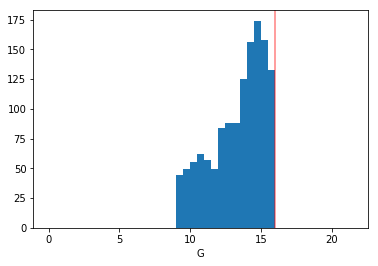

In [7]:
import matplotlib.pyplot as pl
d = targets.data
pl.hist(d['phot_g_mean_mag'][mask],bins=np.arange(0,22,0.5));
pl.xlabel('G');
pl.axvline(header['FAINT_LIMIT'],c='r',alpha=0.5);

Adjust to secondary target data model: